In [1]:
import pandas as pd

In [2]:
import pandas as pd

# Try with 'latin1' encoding
df = pd.read_csv('Sample_Superstore.csv', encoding='latin1')
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.248,3,0.2,4.1028
9990,9991,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2,0.0,15.6332
9991,9992,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.576,2,0.2,19.3932
9992,9993,CA-2017-121258,2/26/2017,03-03-2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4,0.0,13.3200
9993,9994,CA-2017-119914,05-04-2017,05-09-2017,Second Class,CC-12220,Chris Cortes,Consumer,United States,Westminster,...,92683,West,OFF-AP-10002684,Office Supplies,Appliances,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2,0.0,72.9480


In [4]:
import numpy as np

# Load the data with safe encoding
df = pd.read_csv('Sample_Superstore.csv', encoding='latin1')

# Overview
print(df.info())
print(df.isnull().sum())

# Drop columns with all missing values (if any)
df.dropna(axis=1, how='all', inplace=True)

# Fix data types if needed (example for Date)
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Optional: remove rows with missing dates or key info
df.dropna(subset=['Order Date', 'Sales', 'Profit'], inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

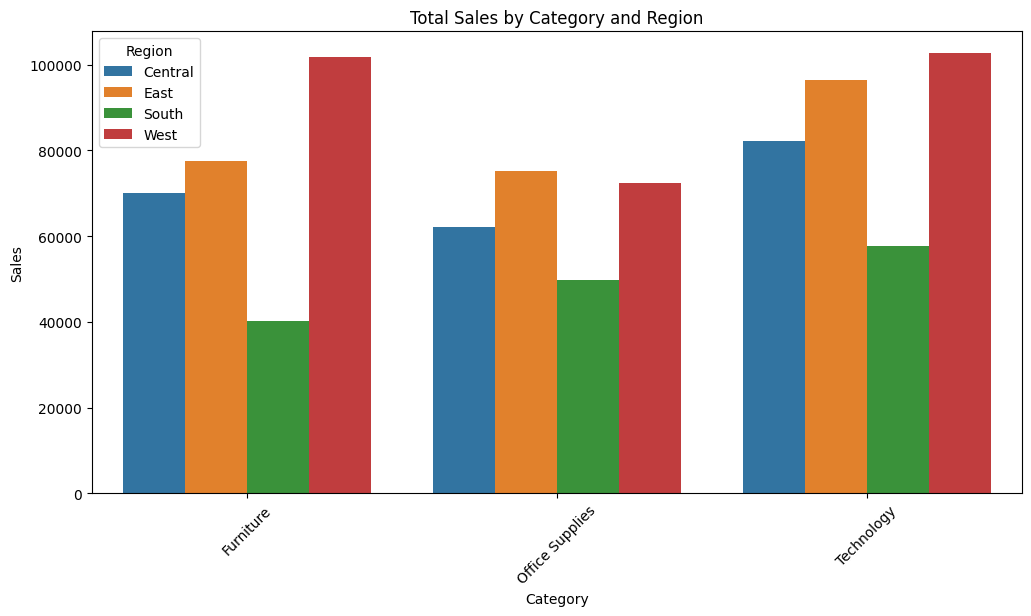

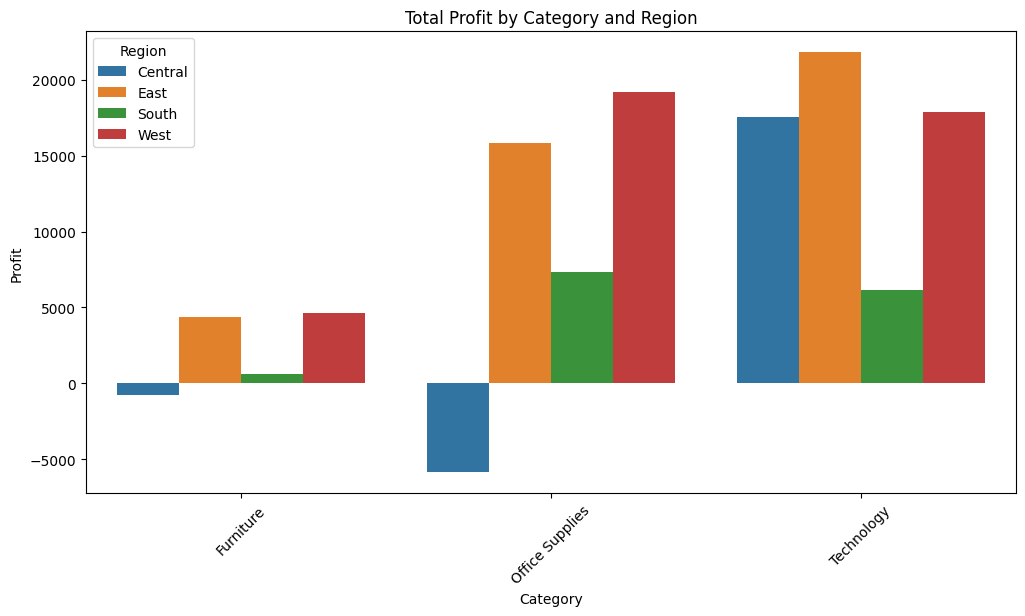

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by Category and Region
category_region = df.groupby(['Category', 'Region'])[['Sales', 'Profit']].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_region, x='Category', y='Sales', hue='Region')
plt.title('Total Sales by Category and Region')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_region, x='Category', y='Profit', hue='Region')
plt.title('Total Profit by Category and Region')
plt.xticks(rotation=45)
plt.show()


C:\Users\himan\AppData\Local\Temp\ipykernel_10748\2121736599.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')


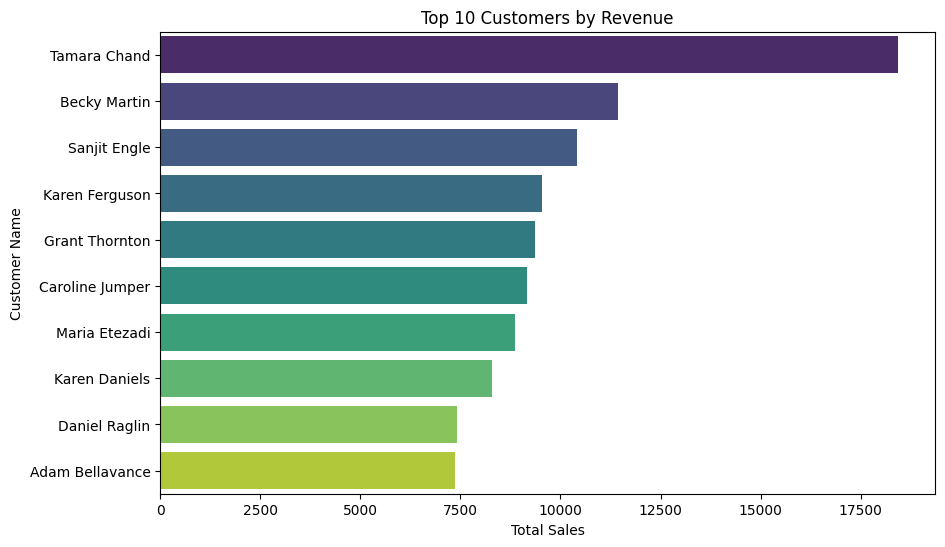

In [15]:
top_customers = df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Sales')
plt.ylabel('Customer Name')
plt.show()


In [9]:
# A small group of customers generates a large portion of revenue. These are likely loyal, high-value customers.
# Focus on retaining these top customers through loyalty programs, personalized offers, or early access to new products. 
# Also, analyze their buying behavior to find similar customer profiles for upselling.

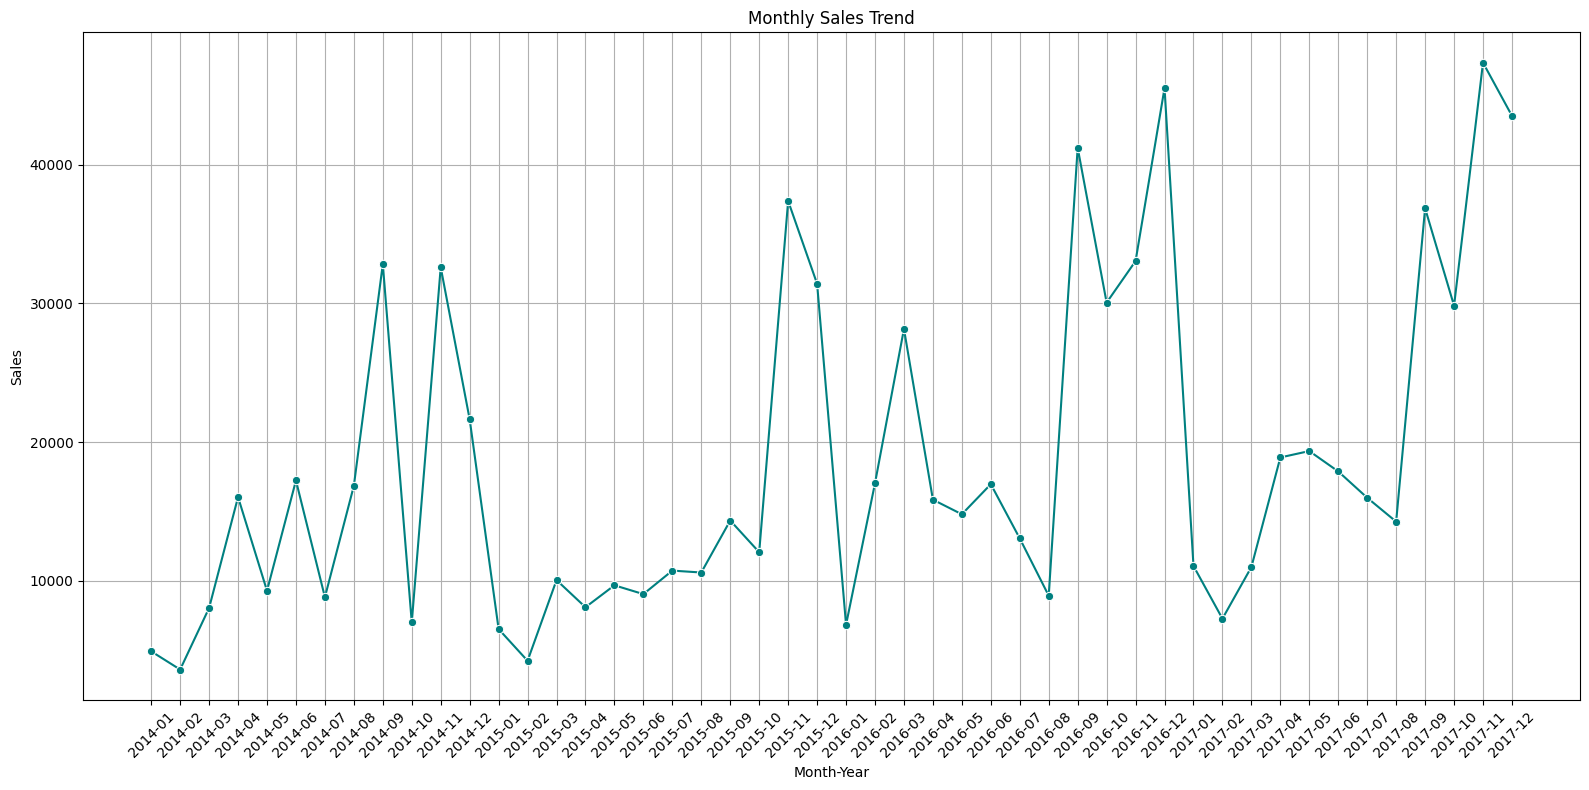

In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Month-Year'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month-Year')['Sales'].sum().reset_index()
monthly_sales['Month-Year'] = monthly_sales['Month-Year'].astype(str)

plt.figure(figsize=(16, 8))
sns.lineplot(data=monthly_sales, x='Month-Year', y='Sales', marker='o', color='teal')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# There are noticeable peaks in certain months (e.g., November and December), suggesting seasonality or end-of-year promotions.
# The company experiences higher sales during specific periods (likely due to holidays or festivals). 
# Focused campaigns around these months can maximize revenue, while off-season months could benefit from targeted discounts or new launches.

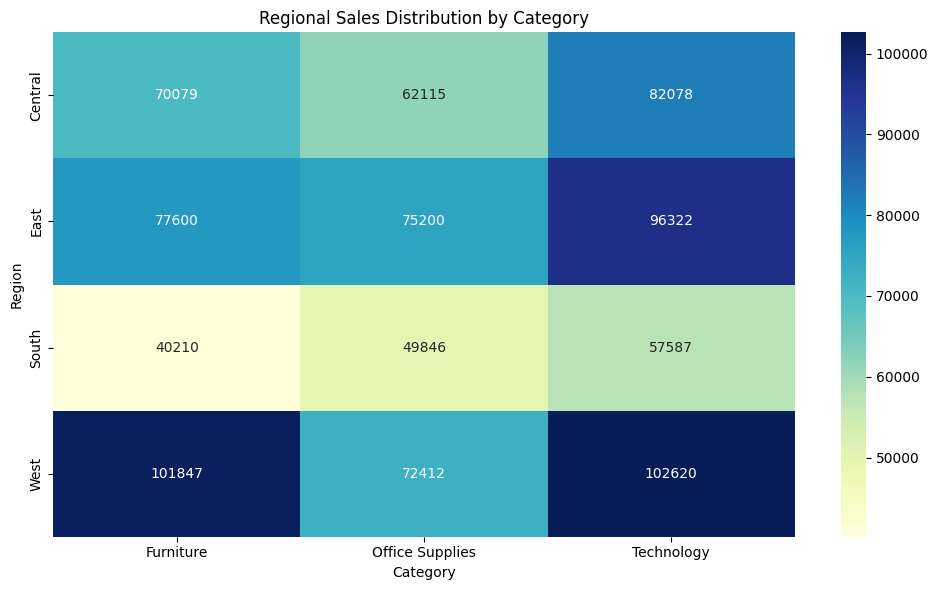

In [12]:
# Heatmaps for regional sales distribution

heatmap_data = df.pivot_table(values='Sales', index='Region', columns='Category', aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Regional Sales Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [13]:
# The West and East regions show stronger sales across all categories, especially in Technology and Furniture. 
# The South and Central regions contribute relatively less.
# Regional sales strategies should be customized. While West and East are mature markets, the South and Central regions 
# may require localized promotions, improved logistics, or better customer outreach.